In [1]:
print("bobnet debug")

bobnet debug


In [2]:
from fetch_it import mnist

x_train,y_train, x_test,y_test = mnist()

In [3]:
import numpy as np
from frame import layer_init

In [4]:
def forward_backward(x,y,l1,l2):
    """forward pass is good"""
    f_l1 = x@l1 # (1,128)
    f_re = np.maximum(f_l1,0)
    f_l2 = f_re@l2 # (1,10)

    # backward
    out = np.zeros((len(y),10),np.float32)
    out[range(out.shape[0]),y] = 1

    # from pytorch: loss(x,class) = -x[class] + log(exp(x[j]).sum(), j belongs to class)
    los = (-f_l2 + np.log(np.exp(f_l2).sum(axis=1)).reshape((-1,1)))
    loss = (out*los).mean(axis=1)

    d_out = -out/len(y)
    grads = d_out - np.exp(-los)*d_out.sum(axis=1).reshape((-1,1))

    d_l2 = f_re.T.dot(grads)

    #dx_relu = grads.dot(l2.T)

    dx_l1 = (f_re > 0).astype(np.float32) * (grads.dot(l2.T))

    d_l1 = x.T.dot(dx_l1)

    return loss, d_l1, d_l2 

In [5]:
from tqdm import tqdm

np.random.seed(1337)

l1 = layer_init(784,128)
l2 = layer_init(128,10)

losses = []
learning_rate = 1e-3
batch_size = 32
for i in tqdm(range(1000)):
    samp = np.random.randint(0,x_train.shape[0],size=(batch_size))
    X = x_train[samp].reshape((-1,28**2))
    Y = y_train[samp]
    loss, d_l1, d_l2 = forward_backward(X,Y,l1,l2)
    l1 -= learning_rate * d_l1
    l2 -= learning_rate * d_l2

    losses.append(loss.mean())

losses[:10]

100%|██████████| 1000/1000 [00:00<00:00, 2503.00it/s]


[0.24946107,
 0.18927425,
 0.2732218,
 0.21821198,
 0.232851,
 0.18468061,
 0.11960558,
 0.104530305,
 0.08665274,
 0.13932966]

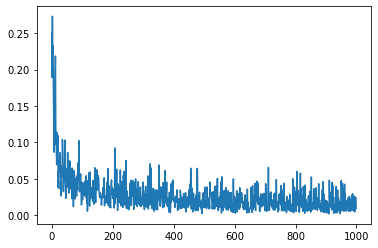

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [8]:
cat = np.maximum((x_test[0].reshape((-1,28**2)) @ l1),0) @ l2
(cat.argmax() == y_test[0]).astype(np.float32)

1.0